# VacationPy
----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
import json
from pprint import pprint



### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [23]:
path_stats_file = "game_stats.csv"
game_stats_df = pd.read_csv(path_stats_file)
game_stats_df.head()

,Unnamed: 0,gameId,season,week,lastName,firstName,position,uniformNumber,opponent,team,...,passTds,ints,sacks,sackYds,rush,rushYds,rushTds,rec,recYds,recTds
0,0,4936,2020,1,Juszczyk,K,FB,40,Cardinals,49ers,...,0,0,0,0,1,7,0,1,41,0
1,1,4936,2020,1,Garoppolo,J,QB,10,Cardinals,49ers,...,2,0,3,16,1,9,0,0,0,0
2,2,4936,2020,1,Mostert,R,RB,43,Cardinals,49ers,...,0,0,0,0,15,56,0,4,95,1
3,3,4936,2020,1,McKinnon,J,RB,31,Cardinals,49ers,...,0,0,0,0,3,24,0,3,20,1
4,4,4936,2020,1,Coleman,T,RB,26,Cardinals,49ers,...,0,0,0,0,4,18,0,1,6,0


In [3]:
game_stats_df.query('lastName=="Garoppolo" and gameId == 4936')

,Unnamed: 0,gameId,season,week,lastName,firstName,position,uniformNumber,opponent,team,...,passTds,ints,sacks,sackYds,rush,rushYds,rushTds,rec,recYds,recTds
1,1,4936,2020,1,Garoppolo,J,QB,10,Cardinals,49ers,...,2,0,3,16,1,9,0,0,0,0


In [24]:

path_weather_QB_file = "QB Stats and Weather Data.csv"
weather_QB_pd = pd.read_csv(path_weather_QB_file)
weather_QB_pd.head()

,Unnamed: 0,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
0,0,4936,2020,1,Garoppolo,J,QB,10,Cardinals,49ers,...,0,0,0,102.967172,2020.0,Regular,Grass,66.0,haze,6.00
1,1,4932,2020,1,Trubisky,Mitchell,QB,10,Lions,Bears,...,0,0,0,104.166667,2020.0,Regular,Turf-Dome,71.0,partly cloudy,14.00
2,2,4935,2020,1,Burrow,Joe,QB,9,Chargers,Bengals,...,0,0,0,66.087963,2020.0,Regular,Turf,83.0,partly cloudy,6.00
3,3,4926,2020,1,Allen,Josh,QB,17,Jets,Bills,...,0,0,0,104.619565,2020.0,Regular,Grass,67.0,cloudy,15.00
4,4,4940,2020,1,Lock,Drew,QB,3,Titans,Broncos,...,0,0,0,95.012626,2020.0,Regular,Grass,74.0,clear sky,1.01


In [5]:
QB_rating_condition = weather_QB_pd[["QB Rating", "conditions"]]
QB_rating_condition
#Remove Nan from dataSet
QB_rating_condition["conditions"].value_counts()

clear sky               179
overcast clouds         118
broken clouds            85
few clouds               71
cloudy                   48
scattered clouds         45
light rain               20
moderate rain            18
partly cloudy            15
mist                      9
haze                      8
light snow                4
rain                      3
heavy intensity rain      2
fog                       2
thunderstorm              2
Name: conditions, dtype: int64

In [6]:
QB_rating_condition_narrow = QB_rating_condition.query('conditions == "clear sky" or conditions == "overcast clouds" or conditions == "light snow" ')
QB_rating_condition_narrow

,QB Rating,conditions
4,95.012626,clear sky
22,98.897059,clear sky
24,107.500000,clear sky
31,117.838542,clear sky
33,97.916667,clear sky
...,...,...
624,64.692982,clear sky
625,106.944444,overcast clouds
626,118.750000,overcast clouds
631,89.155983,overcast clouds


In [7]:
x_axis_pd = QB_rating_condition_narrow["conditions"]
x_axis_pd 

4            clear sky
22           clear sky
24           clear sky
31           clear sky
33           clear sky
            ...       
624          clear sky
625    overcast clouds
626    overcast clouds
631    overcast clouds
632    overcast clouds
Name: conditions, Length: 301, dtype: object

<BarContainer object of 301 artists>

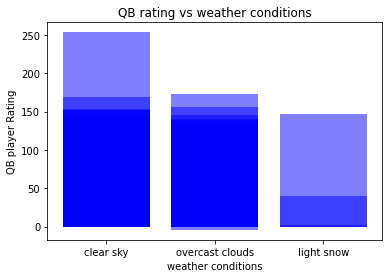

In [22]:
plt.title("QB rating vs weather conditions")
plt.xlabel("weather conditions")
plt.ylabel("QB player Rating")
plt.bar(QB_rating_condition_narrow["conditions"], QB_rating_condition_narrow["QB Rating"], color='b', alpha=0.5, align="center")

<BarContainer object of 639 artists>

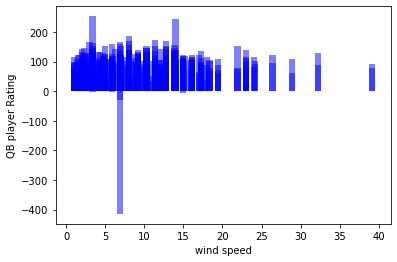

In [9]:
x_axis_wind_speed = weather_QB_pd["windSpeed"]
x_axis_wind_speed
y_axis_wind_speed = weather_QB_pd["QB Rating"]
plt.xlabel("wind speed")
plt.ylabel("QB player Rating")
plt.bar(x_axis_wind_speed, y_axis_wind_speed , color='b', alpha=0.5, align="center")

In [49]:
QB_rating_temperature = weather_QB_pd[["QB Rating", "temperature"]]

#Remove Nan from dataSet
QB_rating_temperature["temperature"].value_counts()

57.0    25
75.0    24
35.0    21
52.0    21
69.0    20
        ..
96.0     2
89.0     2
95.0     2
82.0     2
87.0     1
Name: temperature, Length: 64, dtype: int64

In [64]:
QB_rating_temperature.dropna(inplace=True)

<ipython-input-64-db70d1667053>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QB_rating_temperature.dropna(inplace=True)


In [65]:
QB_rating_temperature


,QB Rating,temperature
0,102.967172,66.0
1,104.166667,71.0
2,66.087963,83.0
3,104.619565,67.0
4,95.012626,74.0
...,...,...
633,115.865385,64.0
634,168.750000,64.0
635,103.317901,64.0
636,127.604167,35.0


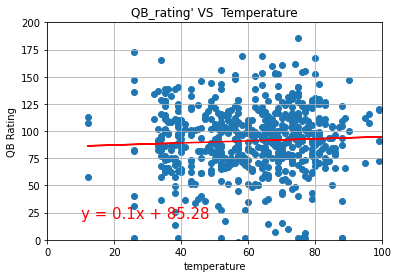

The r-squared value is: 0.0016521929394544895


In [66]:
x_values= QB_rating_temperature["temperature"]
y_values= QB_rating_temperature["QB Rating"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.title("QB_rating' VS  Temperature")
plt.xlabel('temperature')
plt.ylabel('QB Rating')
plt.xlim(0,100)
plt.ylim(0,200)
plt.grid(True)
plt.show()
print(f"The r-squared value is: {rvalue**2}")



In [54]:
 QB_rating_temperature["QB Rating"]

0      102.967172
1      104.166667
2       66.087963
3      104.619565
4       95.012626
          ...    
634    168.750000
635    103.317901
636    127.604167
637     75.260417
638           NaN
Name: QB Rating, Length: 639, dtype: float64

,QB Rating,temperature
0,102.967172,66.0
1,104.166667,71.0
2,66.087963,83.0
3,104.619565,67.0
4,95.012626,74.0
...,...,...
633,115.865385,64.0
634,168.750000,64.0
635,103.317901,64.0
636,127.604167,35.0


In [28]:
#Rain
QB_rating_rain_df1 = weather_QB_pd.query('(conditions == "rain rain " or conditions == "heavy intensity rain") and lastName == "Jackson" ')

QB_rating_rain_df1

,Unnamed: 0,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
64,64,5240,2020,2,Jackson,Lamar,QB,8,Texans,Ravens,...,0,0,0,113.888889,2020.0,Regular,Turf-Roof,71.0,heavy intensity rain,17.22


In [32]:
QB_rating_rain_df2 = weather_QB_pd.query('conditions == "heavy intensity rain"')

QB_rating_rain_df2

,Unnamed: 0,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
64,64,5240,2020,2,Jackson,Lamar,QB,8,Texans,Ravens,...,0,0,0,113.888889,2020.0,Regular,Turf-Roof,71.0,heavy intensity rain,17.22
69,69,5240,2020,2,Watson,Deshaun,QB,4,Ravens,Texans,...,0,0,0,89.467593,2020.0,Regular,Turf-Roof,71.0,heavy intensity rain,17.22


In [35]:
weather_QB_pd[["QB Rating"]].describe

<bound method NDFrame.describe of       QB Rating
0    102.967172
1    104.166667
2     66.087963
3    104.619565
4     95.012626
..          ...
634  168.750000
635  103.317901
636  127.604167
637   75.260417
638         NaN

[639 rows x 1 columns]>

In [47]:
#weather data weather_QB_pd
weather_QB_pd[["windSpeed","temperature","conditions"]]

,windSpeed,temperature,conditions
0,6.00,66.0,haze
1,14.00,71.0,partly cloudy
2,6.00,83.0,partly cloudy
3,15.00,67.0,cloudy
4,1.01,74.0,clear sky
...,...,...,...
634,12.75,64.0,few clouds
635,12.75,64.0,few clouds
636,3.36,35.0,mist
637,10.29,38.0,light rain


In [10]:
y2 = weather_city_df.query('City=="Cape Town" and Temperature>65')
y2

,City,Lat,Lng,Max Temp,Humidity %,Cloudiness,Wind Speed,Country,Date,Temperature
0,Cape Town,-33.9258,18.4232,68.34,61,0,1.99,ZA,1627916523,65.3


### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [11]:
#Create a heat map that displays the humidity for every city from Part I.
#column filter = [[]]
Weather_Humidity = weather_city_df[["City","Lat","Lng","Humidity %"]]
Weather_Humidity

,City,Lat,Lng,Humidity %
0,Cape Town,-33.9258,18.4232,61
1,Bluff,-46.6000,168.3333,66
2,Busselton,-33.6500,115.3333,71
3,New Norfolk,-42.7826,147.0587,79
4,Torbay,47.6666,-52.7314,56
...,...,...,...,...
540,Saint Lawrence,36.0553,14.2040,68
541,San Juan de la Maguana,18.8059,-71.2299,55
542,Cervo,43.6702,-7.4101,71
543,Mezen',65.8522,44.2400,73


In [12]:
#Configure gmaps
gmaps.configure(api_key=api_key)

In [13]:
#Use the Lat and Lng as locations and Humidity as the weight.

### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

,City,Lat,Lng,Max Temp,Humidity %,Cloudiness,Wind Speed,Country,Date,Temperature
8,Ranong,9.9658,98.6348,80.06,88,99,12.64,TH,1627916590,80.06
26,Gradačac,44.8808,18.4269,82.58,32,7,5.84,BA,1627916613,82.58
39,Mardin,37.3131,40.7436,99.66,11,20,4.61,TR,1627916631,99.66
58,George Town,5.4112,100.3354,84.88,79,20,4.61,MY,1627916042,84.58
65,Pula,44.8683,13.8481,82.96,42,20,9.22,HR,1627916665,82.94


<ipython-input-21-a3e8c3c3eeb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df["Hotel Name"] = ""


,City,Lat,Lng,Max Temp,Humidity %,Cloudiness,Wind Speed,Country,Date,Temperature,Hotel Name
8,Ranong,9.9658,98.6348,80.06,88,99,12.64,TH,1627916590,80.06,
26,Gradačac,44.8808,18.4269,82.58,32,7,5.84,BA,1627916613,82.58,
39,Mardin,37.3131,40.7436,99.66,11,20,4.61,TR,1627916631,99.66,
58,George Town,5.4112,100.3354,84.88,79,20,4.61,MY,1627916042,84.58,
65,Pula,44.8683,13.8481,82.96,42,20,9.22,HR,1627916665,82.94,
...,...,...,...,...,...,...,...,...,...,...,...
513,Biltine,14.5333,20.9167,89.29,43,90,9.55,TD,1627917260,89.29,
514,Sredniy Ikorets,51.0675,39.7584,90.03,37,15,8.55,RU,1627917261,90.03,
519,Oyama,36.3000,139.8000,85.59,90,87,5.39,JP,1627917268,83.91,
528,Asău,46.4333,26.4000,88.72,36,27,6.02,RO,1627917279,86.95,


,City,Lat,Lng,Max Temp,Humidity %,Cloudiness,Wind Speed,Country,Date,Temperature,Hotel Name
8,Ranong,9.9658,98.6348,80.06,88,99,12.64,TH,1627916590,80.06,Bang Rin
26,Gradačac,44.8808,18.4269,82.58,32,7,5.84,BA,1627916613,82.58,Gradačac
39,Mardin,37.3131,40.7436,99.66,11,20,4.61,TR,1627916631,99.66,Mardin
58,George Town,5.4112,100.3354,84.88,79,20,4.61,MY,1627916042,84.58,George Town
65,Pula,44.8683,13.8481,82.96,42,20,9.22,HR,1627916665,82.94,Pula


C:\Users\arnaz\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,City,Lat,Lng,Max Temp,Humidity %,Cloudiness,Wind Speed,Country,Date,Temperature,Hotel Name
8,Ranong,9.9658,98.6348,80.06,88,99,12.64,TH,1627916590,80.06,Bang Rin
26,Gradačac,44.8808,18.4269,82.58,32,7,5.84,BA,1627916613,82.58,Gradačac
39,Mardin,37.3131,40.7436,99.66,11,20,4.61,TR,1627916631,99.66,Mardin
58,George Town,5.4112,100.3354,84.88,79,20,4.61,MY,1627916042,84.58,George Town
65,Pula,44.8683,13.8481,82.96,42,20,9.22,HR,1627916665,82.94,Pula
...,...,...,...,...,...,...,...,...,...,...,...
513,Biltine,14.5333,20.9167,89.29,43,90,9.55,TD,1627917260,89.29,Biltine
514,Sredniy Ikorets,51.0675,39.7584,90.03,37,15,8.55,RU,1627917261,90.03,Sredniy Ikorets
519,Oyama,36.3000,139.8000,85.59,90,87,5.39,JP,1627917268,83.91,Oyama
528,Asău,46.4333,26.4000,88.72,36,27,6.02,RO,1627917279,86.95,Comănești


,City,Lat,Lng,Max Temp,Humidity %,Cloudiness,Wind Speed,Country,Date,Temperature,Hotel Name
8,Ranong,9.9658,98.6348,80.06,88,99,12.64,TH,1627916590,80.06,Bang Rin
26,Gradačac,44.8808,18.4269,82.58,32,7,5.84,BA,1627916613,82.58,Gradačac
39,Mardin,37.3131,40.7436,99.66,11,20,4.61,TR,1627916631,99.66,Mardin
58,George Town,5.4112,100.3354,84.88,79,20,4.61,MY,1627916042,84.58,George Town
65,Pula,44.8683,13.8481,82.96,42,20,9.22,HR,1627916665,82.94,Pula
...,...,...,...,...,...,...,...,...,...,...,...
513,Biltine,14.5333,20.9167,89.29,43,90,9.55,TD,1627917260,89.29,Biltine
514,Sredniy Ikorets,51.0675,39.7584,90.03,37,15,8.55,RU,1627917261,90.03,Sredniy Ikorets
519,Oyama,36.3000,139.8000,85.59,90,87,5.39,JP,1627917268,83.91,Oyama
528,Asău,46.4333,26.4000,88.72,36,27,6.02,RO,1627917279,86.95,Comănești


Figure(layout=FigureLayout(height='420px'))